# Importing libraries & cleaned dataset from previous notebook

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings("ignore")

In [27]:
df = pd.read_csv("data/train.csv")

#dropping id column as the dataframe already has index
df =df.drop("id",axis=1)
df.head()

,age,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,screen_time_hours_per_day,bmi,waist_to_hip_ratio,systolic_bp,diastolic_bp,...,gender,ethnicity,education_level,income_level,smoking_status,employment_status,family_history_diabetes,hypertension_history,cardiovascular_history,diagnosed_diabetes
0,31,1,45,7.7,6.8,6.1,33.4,0.93,112,70,...,Female,Hispanic,Highschool,Lower-Middle,Current,Employed,0,0,0,1.0
1,50,2,73,5.7,6.5,5.8,23.8,0.83,120,77,...,Female,White,Highschool,Upper-Middle,Never,Employed,0,0,0,1.0
2,32,3,158,8.5,7.4,9.1,24.1,0.83,95,89,...,Male,Hispanic,Highschool,Lower-Middle,Never,Retired,0,0,0,0.0
3,54,3,77,4.6,7.0,9.2,26.6,0.83,121,69,...,Female,White,Highschool,Lower-Middle,Current,Employed,0,1,0,1.0
4,54,1,55,5.7,6.2,5.1,28.8,0.90,108,60,...,Male,White,Highschool,Upper-Middle,Never,Retired,0,1,0,1.0


#### Seperating numerical & categorical columns for EDA

In [20]:
numerical_cols = df.select_dtypes(exclude=['object'])
categorical_cols = df.select_dtypes(include=['object'])

# 1. Working on Categorical columns first

### **Bi-Variate Analysis**

In [6]:
categorical_cols

,gender,ethnicity,education_level,income_level,smoking_status,employment_status
0,Female,Hispanic,Highschool,Lower-Middle,Current,Employed
1,Female,White,Highschool,Upper-Middle,Never,Employed
2,Male,Hispanic,Highschool,Lower-Middle,Never,Retired
3,Female,White,Highschool,Lower-Middle,Current,Employed
4,Male,White,Highschool,Upper-Middle,Never,Retired
...,...,...,...,...,...,...
699995,Female,Hispanic,Postgraduate,Upper-Middle,Former,Employed
699996,Female,Hispanic,Graduate,Upper-Middle,Former,Employed
699997,Female,White,Graduate,Middle,Never,Employed
699998,Female,White,Highschool,Lower-Middle,Never,Retired


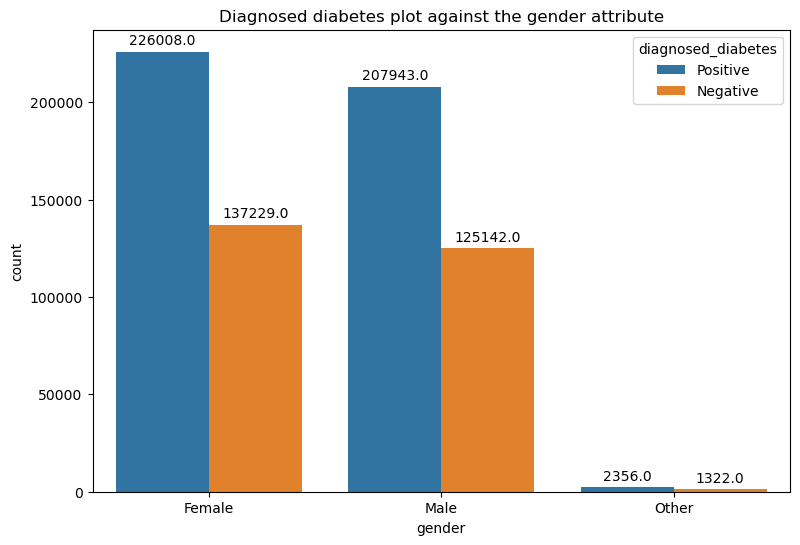

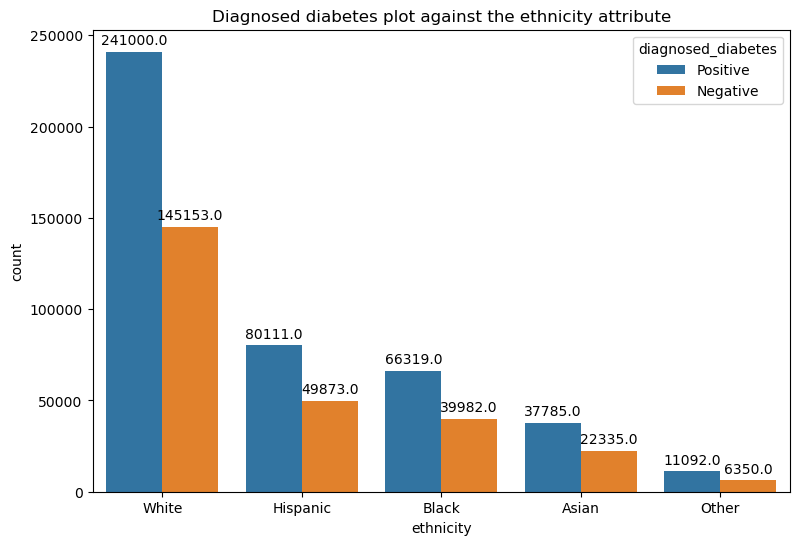

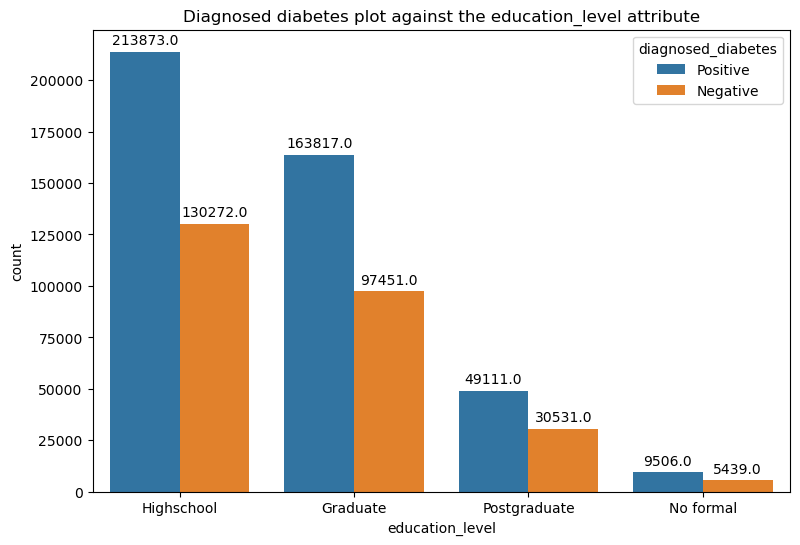

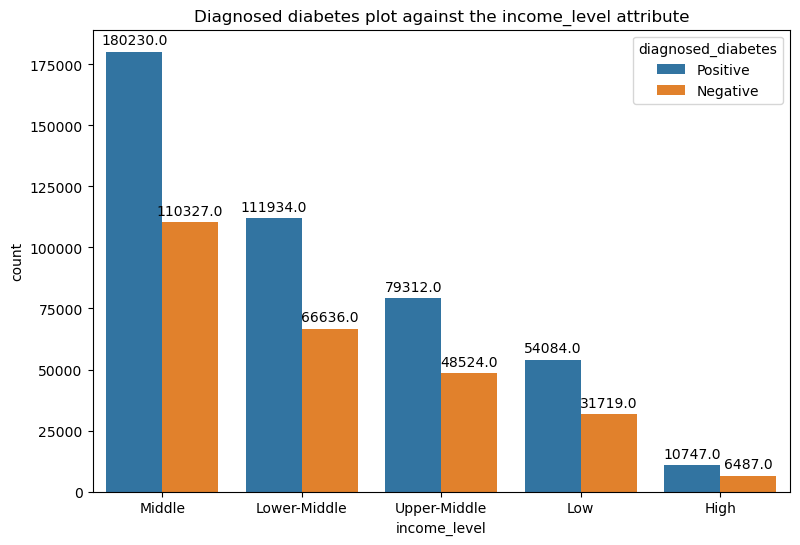

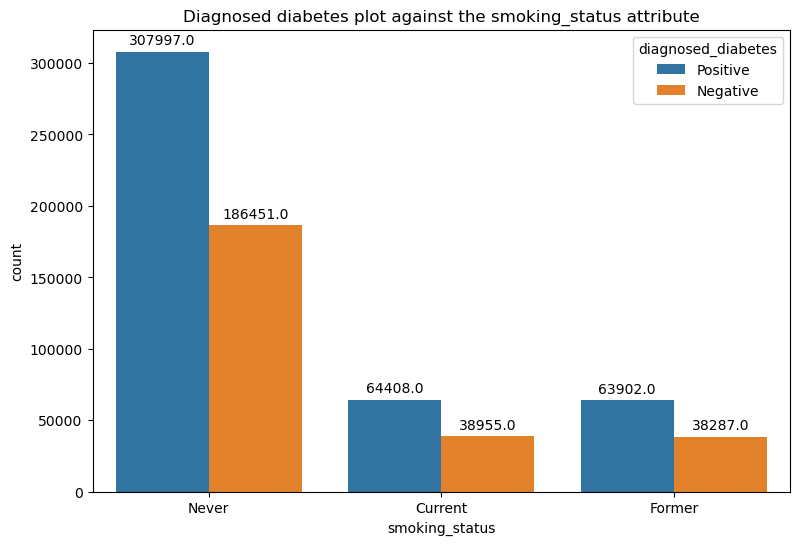

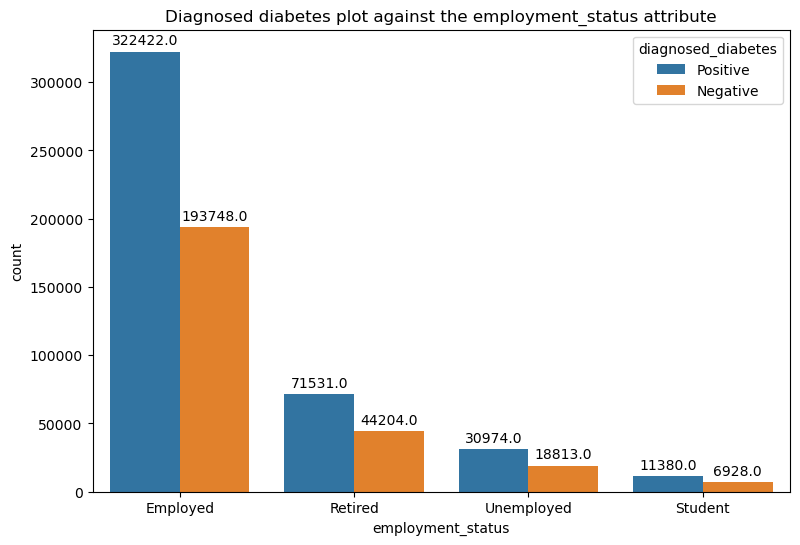

In [7]:
# for plotting purposes, since there are only binary values of 'diagnosed_diabetes' column
# let's map those float values to strings for plotting purpose

mapping = {0.0:"Negative",1.0:"Positive"}

mapped_diagnosed_diabetes_df = df['diagnosed_diabetes'].map(mapping)

for x in categorical_cols:

    plt.figure(figsize=(9,6))
    plt.title(f"Diagnosed diabetes plot against the {x} attribute")
    order = categorical_cols[f"{x}"].value_counts().sort_values(ascending=False).index
    ax= sb.countplot(data=df, x=categorical_cols[f"{x}"],hue=mapped_diagnosed_diabetes_df,order=order)
    for container in ax.containers:
        ax.bar_label(container,fmt='%.1f', label_type='edge', padding=3)

    plt.show()

# 2. Working on Numerical columns

### **Bi-Variate Analysis**

In [21]:
numerical_cols

,age,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,screen_time_hours_per_day,bmi,waist_to_hip_ratio,systolic_bp,diastolic_bp,heart_rate,cholesterol_total,hdl_cholesterol,ldl_cholesterol,triglycerides,family_history_diabetes,hypertension_history,cardiovascular_history,diagnosed_diabetes
0,31,1,45,7.7,6.8,6.1,33.4,0.93,112,70,62,199,58,114,102,0,0,0,1.0
1,50,2,73,5.7,6.5,5.8,23.8,0.83,120,77,71,199,50,121,124,0,0,0,1.0
2,32,3,158,8.5,7.4,9.1,24.1,0.83,95,89,73,188,59,114,108,0,0,0,0.0
3,54,3,77,4.6,7.0,9.2,26.6,0.83,121,69,74,182,54,85,123,0,1,0,1.0
4,54,1,55,5.7,6.2,5.1,28.8,0.90,108,60,85,206,49,131,124,0,1,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699995,29,1,59,6.9,5.2,1.5,26.1,0.88,133,57,69,163,58,90,126,0,0,0,0.0
699996,46,2,72,7.7,7.7,3.8,25.5,0.85,106,85,65,188,45,107,119,0,0,1,1.0
699997,35,1,50,5.6,6.1,6.4,26.9,0.88,127,84,63,168,59,77,166,0,0,0,1.0
699998,49,2,70,5.7,6.9,4.7,25.2,0.86,116,67,69,198,55,108,133,0,0,0,1.0


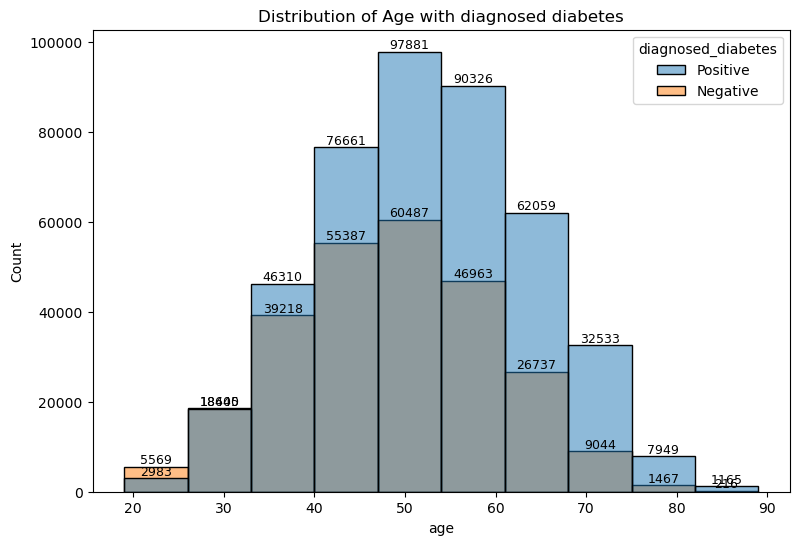

In [9]:
mapping = {0.0:"Negative",1.0:"Positive"}

mapped_diagnosed_diabetes_df = df['diagnosed_diabetes'].map(mapping)

plt.figure(figsize=(9,6))
plt.title("Distribution of Age with diagnosed diabetes")

ax= sb.histplot(data=numerical_cols,x='age',bins=10,hue=mapped_diagnosed_diabetes_df)
for container in ax.containers:
    ax.bar_label(container, fmt='%d', fontsize=9)


plt.show()

## *For plotting purposes, let's seperate the columns having continous values & columns having continous but unique & limited values.*

In [ ]:
cols_with_unique_vals =[]
cols_with_continous_vals=[]

for x in numerical_cols:
    if len(numerical_cols[f"{x}"].unique()) <= 10:
        cols_with_unique_vals.append(x)
    else:
        cols_with_continous_vals.append(x)

print(cols_with_unique_vals)
print(cols_with_continous_vals)
    

['alcohol_consumption_per_week', 'family_history_diabetes', 'hypertension_history', 'cardiovascular_history', 'diagnosed_diabetes']
['age', 'physical_activity_minutes_per_week', 'diet_score', 'sleep_hours_per_day', 'screen_time_hours_per_day', 'bmi', 'waist_to_hip_ratio', 'systolic_bp', 'diastolic_bp', 'heart_rate', 'cholesterol_total', 'hdl_cholesterol', 'ldl_cholesterol', 'triglycerides']


### 2.1 Plotting distribution of unique columns with diagnosed diabetes attribute

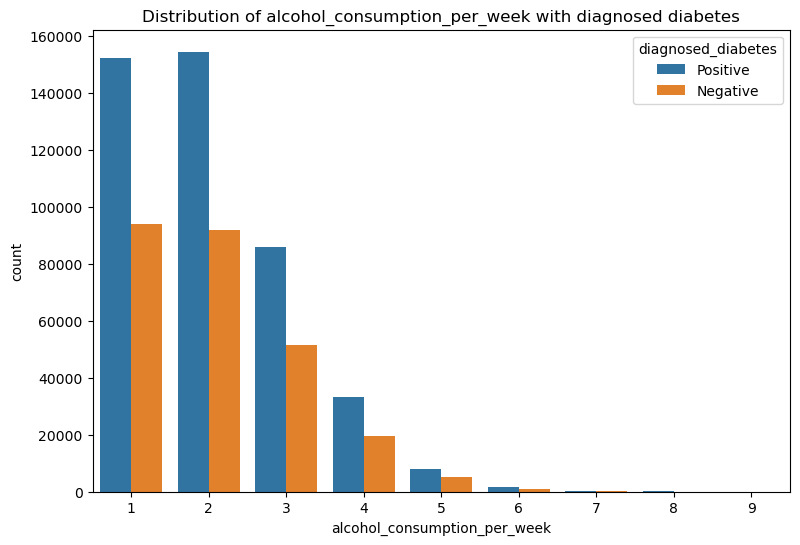

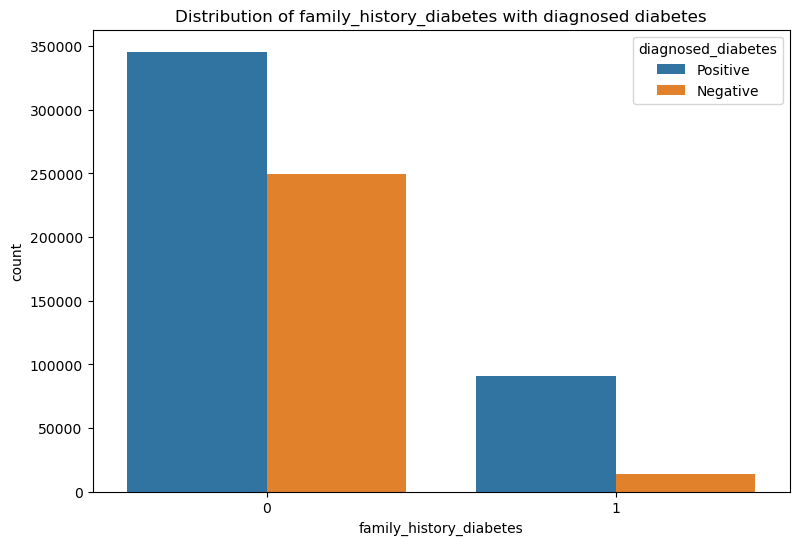

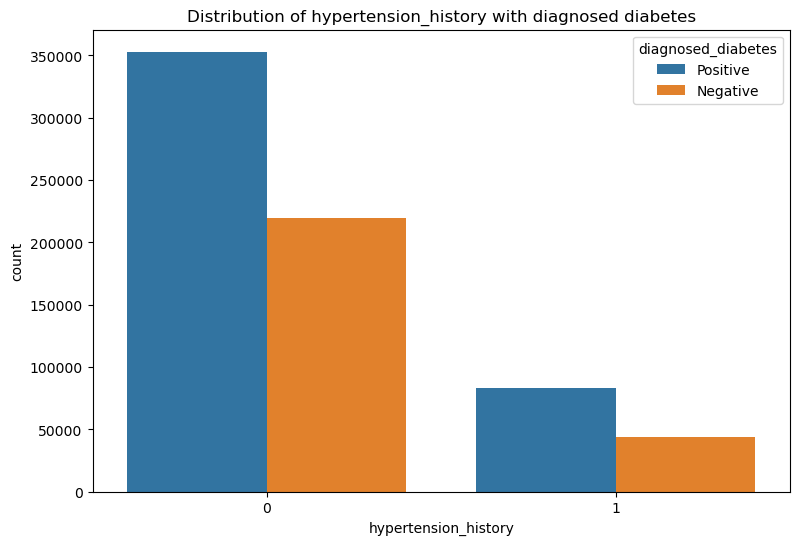

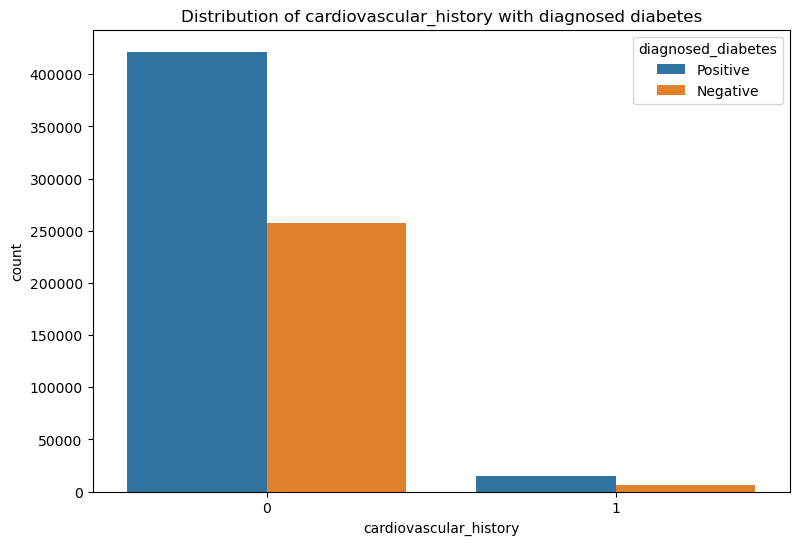

In [ ]:
mapping = {0.0:"Negative",1.0:"Positive"}

mapped_diagnosed_diabetes_df = df['diagnosed_diabetes'].map(mapping)

for x in cols_with_unique_vals[:-1]:
    plt.figure(figsize=(9,6))
    plt.title(f"Distribution of {x} with diagnosed diabetes")

    ax= sb.countplot(data=numerical_cols,x=numerical_cols[f"{x}"],hue=mapped_diagnosed_diabetes_df)
    plt.show()

### 2.2 Plotting distribution of continous columns with diagnosed diabetes attribute

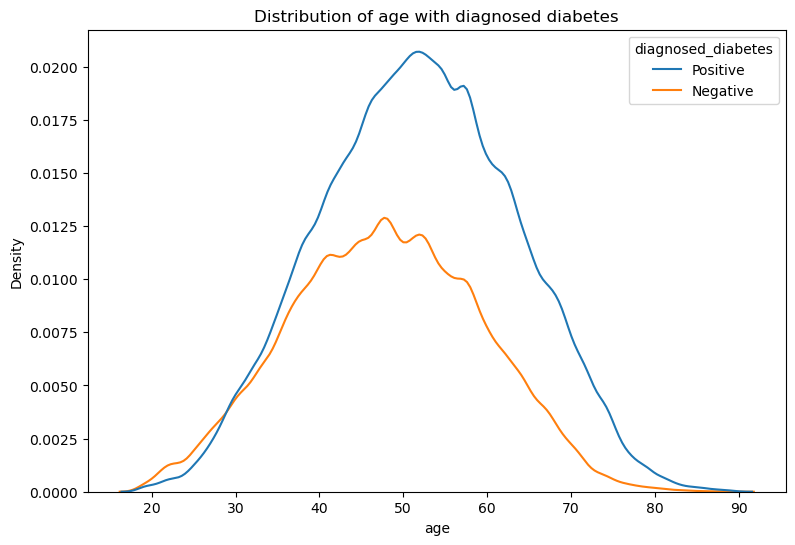

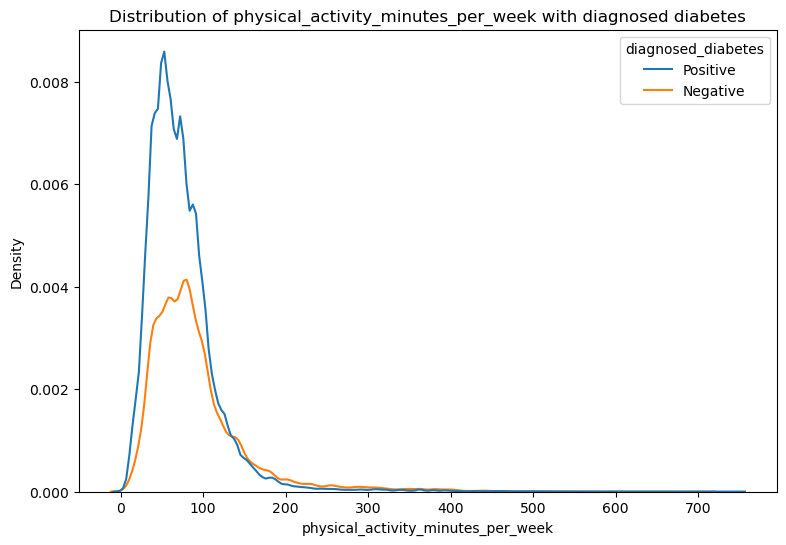

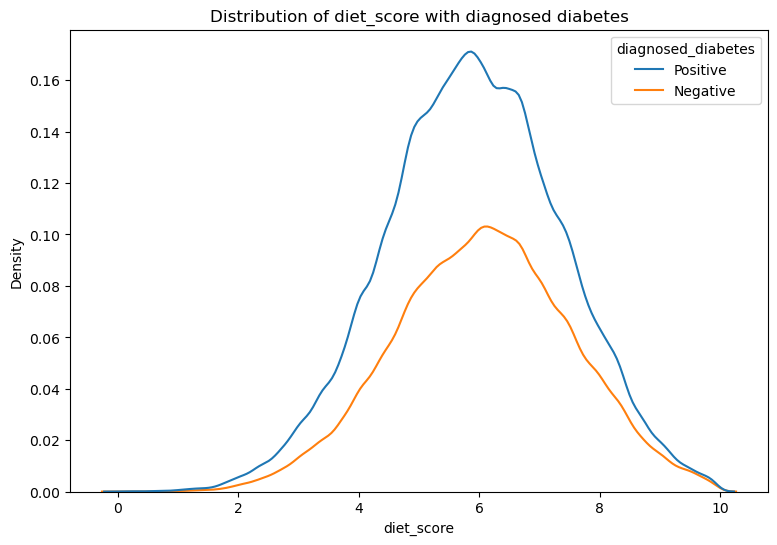

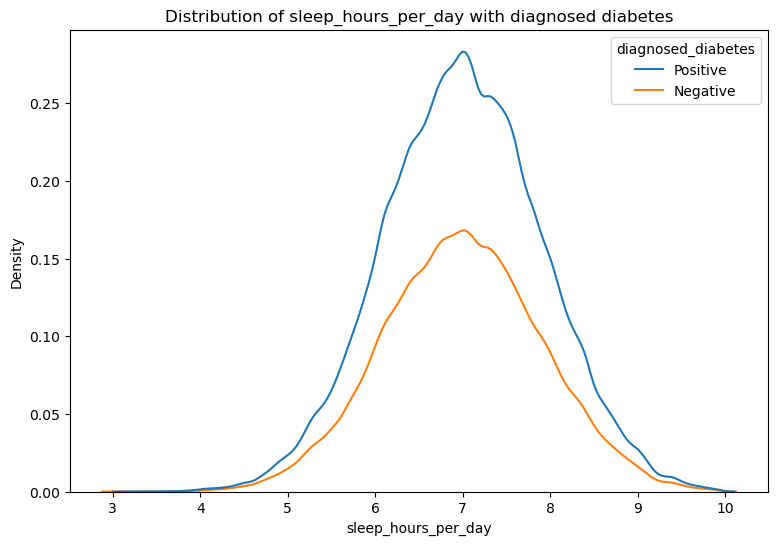

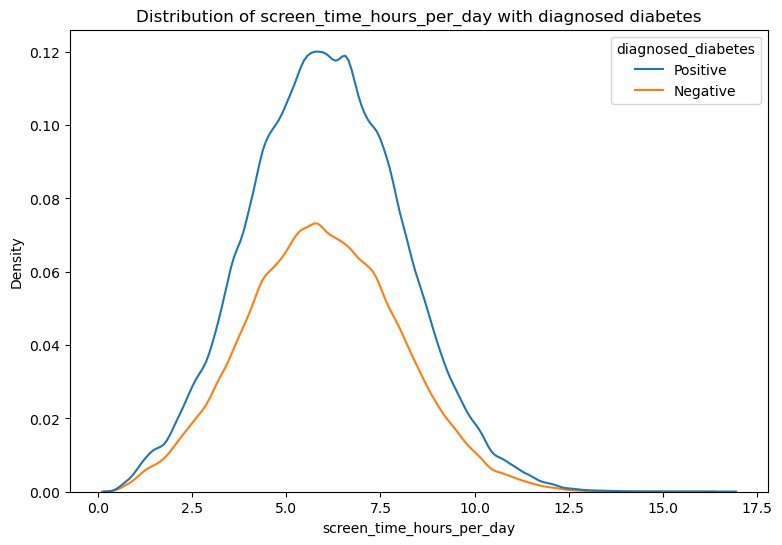

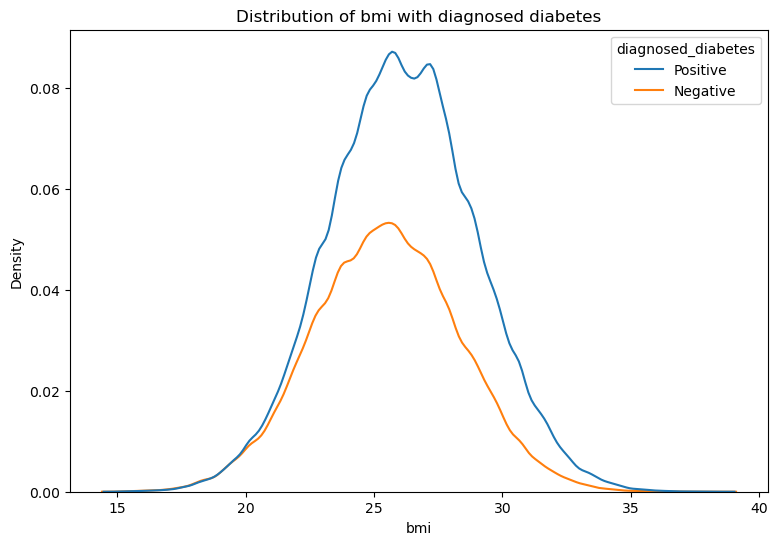

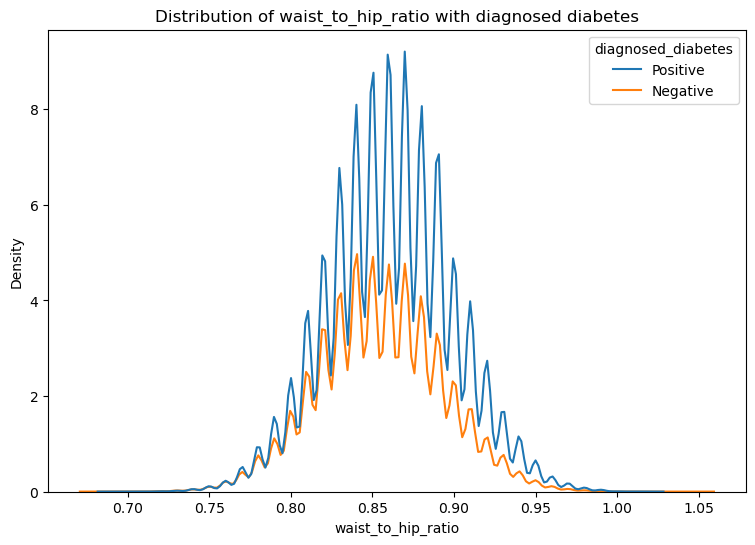

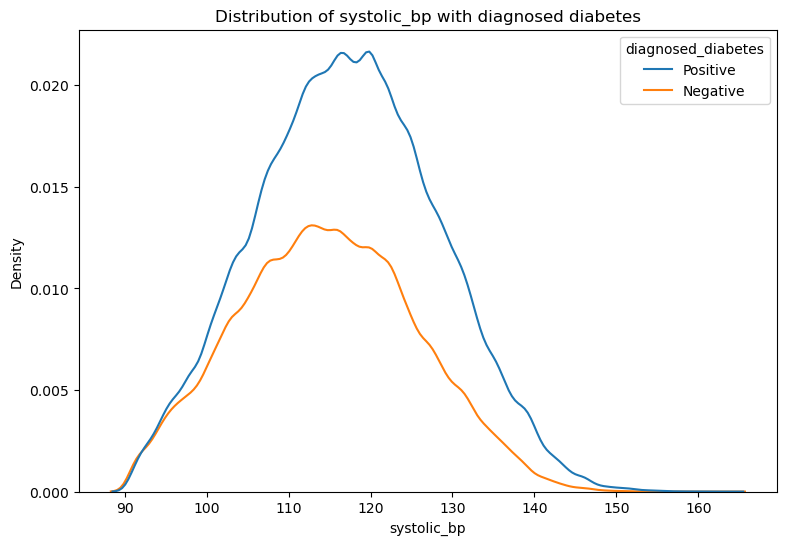

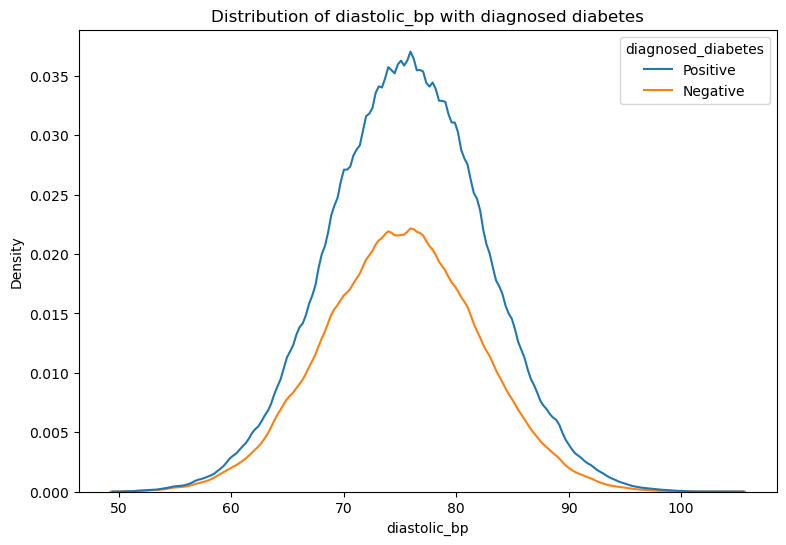

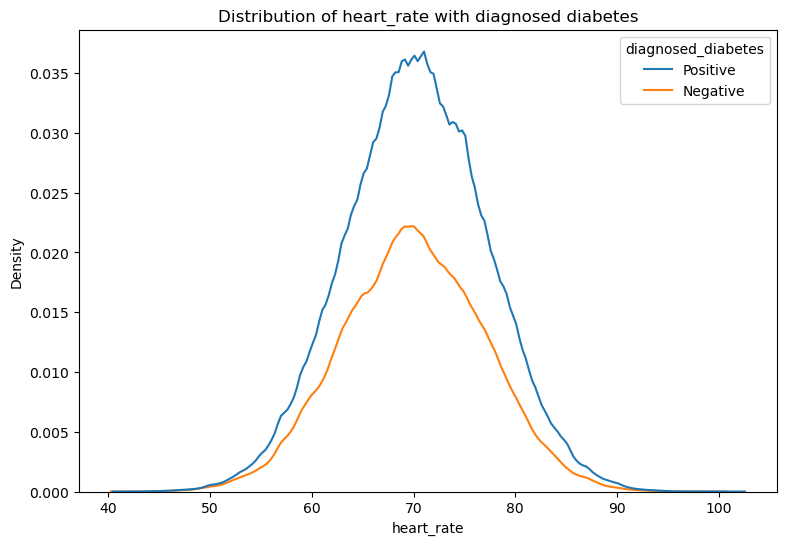

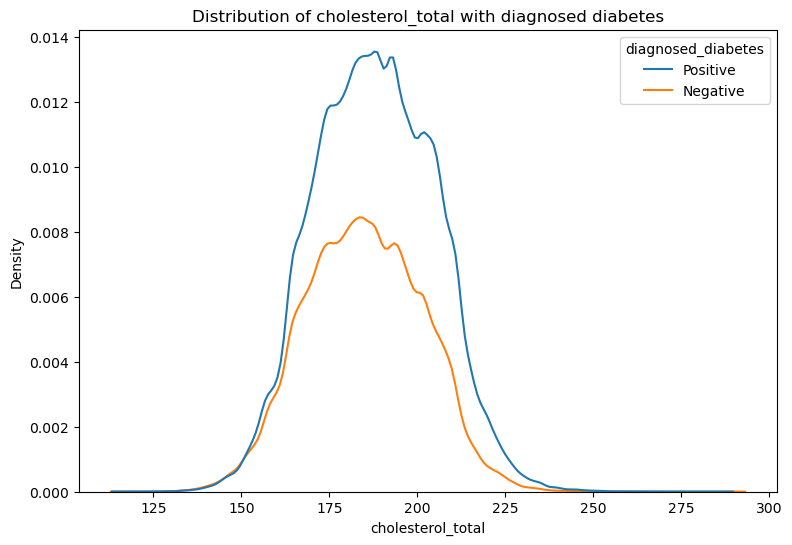

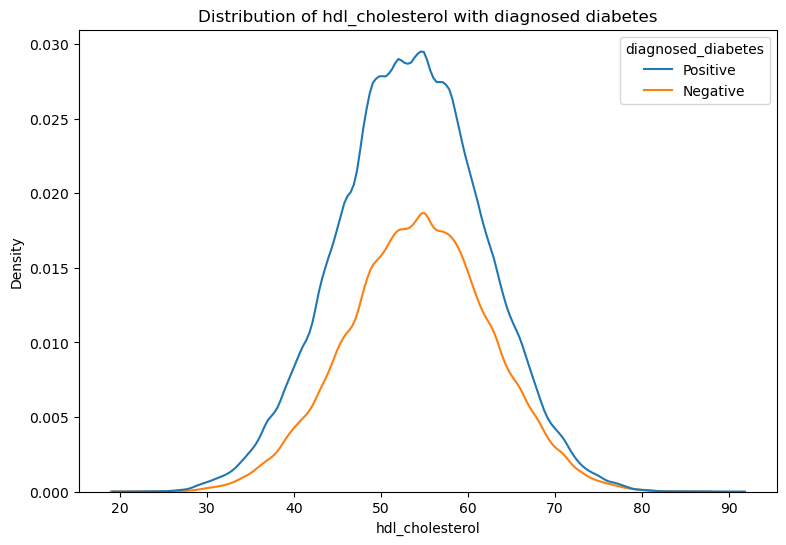

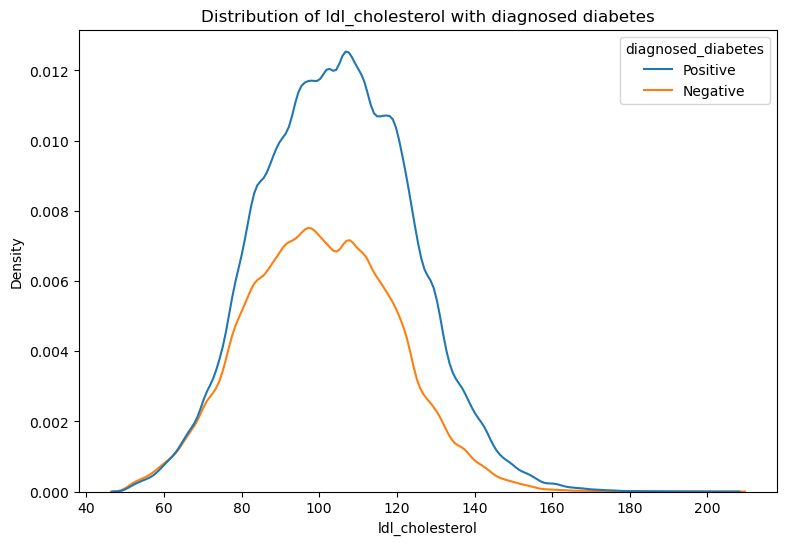

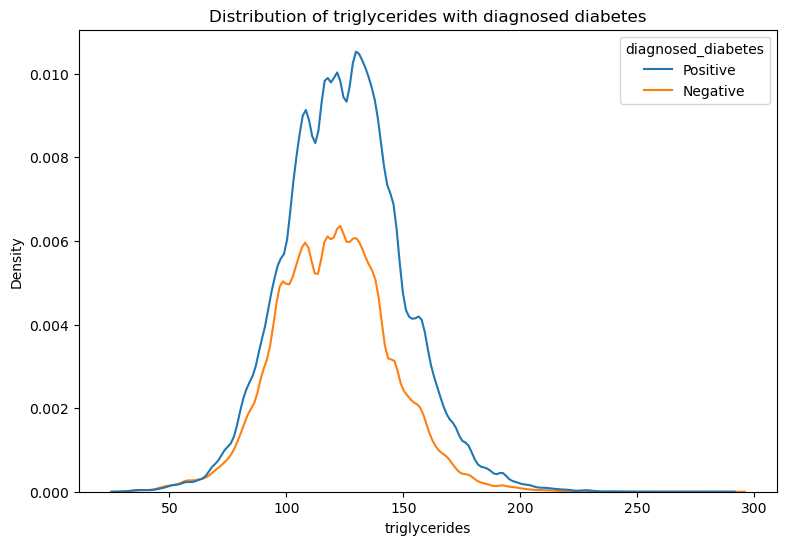

In [13]:
mapping = {0.0:"Negative",1.0:"Positive"}

mapped_diagnosed_diabetes_df = df['diagnosed_diabetes'].map(mapping)

for x in cols_with_continous_vals:

    plt.figure(figsize=(7,5))
    plt.title(f"Distribution of {x} with diagnosed diabetes")

    ax= sb.kdeplot(data=numerical_cols,x=numerical_cols[f'{x}'],hue=mapped_diagnosed_diabetes_df)
    plt.show()

# **Bi-Variate Analysis complete**
# Next Steps: Moving to feature engineering & model training in seperate notebook